In [1]:
import rust_utils

In [35]:
from glob import glob
from pathlib import Path
import regex as re

import numpy as np
import pandas as pd
from tqdm.auto import tqdm
hi navid, are you joining the call? m
tqdm.pandas()

In [3]:
leads = pd.read_csv("data/frameworks_data/data_v0.7.1/leads.csv")
leads.head()

,id,created_at,modified_at,title,source_raw,confidentiality,status,published_on,text,url,...,modified_by_id,project_id,attachment_id,source_type,lead_group_id,client_id,author_raw,author_id,source_id,priority
0,40,2018-02-12 09:07:50.323122+00,2018-04-26 09:10:43.631264+00,Shelter NFI joint need assessment – Host HH Su...,Humanitatian Reponse,unprotected,processed,2017-11-26,NaN,NaN,...,15.0,11,52.0,disk,NaN,NaN,NaN,NaN,NaN,100
1,1,2018-01-08 09:11:20.436858+00,2018-01-08 09:11:20.463321+00,sam_guideline_3rd_edition_10_july_2017.pdf,National Guidelines,unprotected,pending,2018-01-08,NaN,NaN,...,1.0,1,7.0,disk,NaN,NaN,NaN,NaN,NaN,100
2,2,2018-01-08 09:19:48.218483+00,2018-01-08 09:19:48.232292+00,Lead 3:03:45 PM,Newspaper,unprotected,pending,2018-01-08,NaN,https://reliefweb.int/report/south-sudan/six-y...,...,1.0,1,NaN,website,NaN,NaN,NaN,NaN,NaN,100
3,23004,2020-01-08 03:17:50.671567+00,2020-01-09 06:08:08.828593+00,Philippines is 'the lead in the South China Se...,NaN,unprotected,processed,2019-12-08,NaN,https://www.philstar.com/headlines/2019/12/08/...,...,1585.0,848,NaN,website,NaN,NaN,NaN,NaN,3582.0,100
4,19258,2019-10-03 13:12:02.691277+00,2019-10-21 09:37:30.807604+00,Obj 4_Health sector coordination + EOC_workpla...,NaN,unprotected,processed,2017-02-11,NaN,NaN,...,15.0,1410,22325.0,disk,NaN,NaN,NaN,2690.0,2690.0,100


In [4]:
train_df = pd.read_csv("data/frameworks_data/data_v0.7.1/train_v0.7.1.csv")
train_df.head()

/tmp/ipykernel_311852/4124708605.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("data/frameworks_data/data_v0.7.1/train_v0.7.1.csv")


,entry_id,excerpt,analysis_framework_id,lead_id,project_id,verified,sectors,subpillars_2d,subpillars_1d,geo_location,...,affected_groups_level_1,affected_groups_level_2,affected_groups_level_3,source_type,url,website,lang,translation_en,translation_fr,translation_es
0,194719,"[10th November, NW Syria] Now with the lockdow...",1306,43771.0,2028.0,False,[],[],['Covid-19->Restriction Measures'],['Syrian Arab Republic'],...,[],[],[],website,https://reliefweb.int/report/syrian-arab-repub...,www.reliefweb.int,en,NaN,"[10 novembre, NW Syrie] Maintenant, avec le ve...","[10 de noviembre, NW Siria] Ahora, con el bloq..."
1,186152,El Salvador hace frente a una combinación de c...,829,41125.0,1898.0,False,"['Nutrition', 'Protection', 'Food Security', '...",['Humanitarian Conditions->Living Standards'],[],['El Salvador'],...,['Affected'],[],[],website,https://www.acaps.org/sites/acaps/files/key-do...,https://www.acaps.org,es,El Salvador faces a combination of crisis in w...,El Salvador est confronté à une combinaison de...,NaN
2,489431,Extreme poverty and the government’s fiscal li...,1306,67488.0,2225.0,False,['Education'],['Humanitarian Conditions->Living Standards'],['Context->Socio Cultural'],['République démocratique du Congo'],...,['Affected'],[],[],website,https://blogs.worldbank.org/education/free-pri...,blogs.worldbank.org,en,NaN,L'extrême pauvreté et les limitations budgétai...,La pobreza extrema y las limitaciones fiscales...
3,179077,"Le Sénat congolais, la chambre haute du parlem...",1306,41963.0,2225.0,False,[],[],"['Covid-19->Deaths', 'Covid-19->Restriction Me...",['République démocratique du Congo'],...,[],[],[],website,https://www.rtbf.be/info/monde/detail_coronavi...,www.rtbf.be,fr,"The Congolese Senate, the Haute Chamber of Par...",NaN,"El senado congoleño, la alta sala del Parlamen..."
4,186906,Los AFCs requieren de oportunidades para mejor...,829,41080.0,1184.0,False,"['Nutrition', 'Livelihoods']",['Humanitarian Conditions->Living Standards'],[],['Ecuador'],...,[],[],[],website,https://reliefweb.int/sites/reliefweb.int/file...,reliefweb.int,es,AFCs require opportunities to improve their pr...,Les AFC ont besoin d'occasions d'améliorer leu...,NaN


In [5]:
train_df["lang"].value_counts()

en    78089
fr    24718
es    23516
Name: lang, dtype: int64

In [6]:
len(train_df)

126323

In [7]:
train_df["excerpt"].sample(n=5).tolist()

['[05/Oct/2020] [Syria] Al-Sharq Al-Awsat, a pan-Arab newspaper based in London, reported on October 05 that Lebanese authorities had seized a tanker carrying four million litres of petrol on its way from Greece to Syria for a company based in Harasta near Damascus.',
 'A Master Plan for the development of the city of Kismayo was commissioned to a private company by the Government of Jubaland.The resulting document presents an ambitious plan for the extension of the city, with a huge infrastructure provision, the identification of several productive areas and the extension of port and airport',
 '[PROTECTION LIVING STANDARDS GAP (LSG)] 21% of IDP settlement and 39% of non- IDP settlement were with a protection LSG',
 '[15th June 2021, Bangladesh] Meanwhile, Inter-Services Public Relations Directorate on Tuesday said that 136 men, women and children were now mortally ill with diarrhoea in Bandarban. Two people are in critical condition; if their condition does not improve, they will be 

In [6]:
lead_tuples = set(leads.apply(lambda row: (row["id"], row["project_id"]), axis=1))
assert len(lead_tuples) == len(leads)

In [7]:
for i, row in train_df.iterrows():
    lead_tuple = (row["lead_id"], row["project_id"])

    assert lead_tuple in lead_tuples

In [8]:
leads_old = set(
    glob("data/frameworks_data/raw_data_excel_exports/dump/lead_previews/*.txt")
)
leads_new = set(glob("texts/*.txt"))

In [9]:
!ls data/frameworks_data/raw_data_excel_exports/

dump		      geo_geoarea.csv		     projects_properties.csv
exports.7z	      geo_region.csv		     Readme.txt
exports_decoupled.7z  organization_organization.csv


In [40]:
full_texts_old = {}
full_texts_new = {}

for i, row in tqdm(leads.iterrows()):
    lead_id = row["id"]
    project_id = row["project_id"]
    old_name = f"data/frameworks_data/raw_data_excel_exports/dump/lead_previews/leadid_{lead_id}_projectid_{project_id}_leadpreview.txt"
    new_name = str(
        Path("texts") / Path(row["url"].rstrip("/").split("/")[-1]).with_suffix(".txt")
        if row["url"] is not np.nan
        else None
    )

    if old_name in leads_old:
        if (lead_id, project_id) not in full_texts_old:
            text = open(old_name).read()
            text = re.sub("\n+", "\n", text)
            full_texts_old[(lead_id, project_id)] = text
    if new_name in leads_new:
        if (lead_id, project_id) not in full_texts_new:
            text = "\n".join(line for line in open(new_name) if not line.startswith("*********"))
            text = re.sub("\n+", "\n", text)
            full_texts_new[(lead_id, project_id)] = text

0it [00:00, ?it/s]

In [42]:
len(full_texts_old), len(full_texts_new)

(46218, 2534)

In [19]:
train_df = train_df[
    train_df.apply(
        lambda row: (row["lead_id"], row["project_id"]) in full_texts_old and (row["lead_id"], row["project_id"]) in full_texts_new, axis=1
    )
]
len(train_df)

8811

In [20]:
language_map = {}

for (i, group) in train_df.groupby(by=["lead_id", "project_id"])["lang"]:
    counts = group.value_counts()

    language_map[i] = counts.index[0]

# Reduction to Sentence Level

In [29]:
import nnsplit
import spacy

splitter_en = nnsplit.NNSplit.load("en")
splitter_es = nnsplit.NNSplit.load("en")
splitter_fr = nnsplit.NNSplit.load("fr")

def split_texts_nnsplit(texts, languages):
    output = {}
    
    for (splitter, lang) in ([splitter_es, "es"], [splitter_en, "en"], [splitter_fr, "fr"]):
        indices = [key for key, value in languages.items() if value == lang]
        t = [texts[i] for i in indices]
        
        for i, splits in tqdm(zip(indices, splitter.split(t))):
            output[i] = [str(sentence) for sentence in splits]
            
    return output

In [17]:
output_nnsplit = split_texts_nnsplit(full_texts_old, language_map)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [46]:
nlp_en = spacy.load("en_core_web_sm", disable=["ner"])
nlp_fr = spacy.load("fr_core_news_sm", disable=["ner"])
nlp_es = spacy.load("es_core_news_sm", disable=["ner"])

def split_texts_spacy(texts, languages):
    output = {}
    
    for (nlp, lang) in ([nlp_es, "es"], [nlp_en, "en"], [nlp_fr, "fr"]):
        indices = [key for key, value in languages.items() if value == lang]
        t = [texts[i] for i in indices]
        
        for i, doc in tqdm(zip(indices, nlp.pipe(t))):
            output[i] = [x for sentence in doc.sents for x in str(sentence).strip().split("\n")] + [str(sentence) for sentence in doc.sents]
            
    return output

In [47]:
output_spacy = split_texts_spacy(full_texts_new, language_map)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [49]:
def find_sentence_match(row):
    lead_id = row["lead_id"]
    project_id = row["project_id"]

    if row["lang"] == "es":
        nlp = nlp_es
    elif row["lang"] == "en":
        nlp = nlp_en
    elif row["lang"] == "fr":
        nlp = nlp_fr

    excerpt_sentences = [str(s) for s in nlp(row["excerpt"]).sents]
    sentences = output_spacy[(lead_id, project_id)]

    if len(sentences) == 0:
        return None

    best_matches = []

    for excerpt_sentence in excerpt_sentences:
        best_matches.append(
            sorted(
                [(s, rust_utils.levenshtein(s, excerpt_sentence)) for s in sentences],
                key=lambda x: x[1],
            )[0]
        )
    return best_matches

In [50]:
sentence_matches = train_df.progress_apply(find_sentence_match, axis=1)

  0%|          | 0/8811 [00:00<?, ?it/s]

In [51]:
len(train_df)

8811

In [56]:
train_df.loc[44]

entry_id                                                              187192
excerpt                    Atenciones médicas llevadas a cabo desde los C...
analysis_framework_id                                                    829
lead_id                                                              34290.0
project_id                                                            1900.0
verified                                                               False
sectors                                                           ['Health']
subpillars_2d                                                             []
subpillars_1d                                                             []
geo_location                                                    ['Honduras']
specific_needs_groups                                                     []
severity                                                                  []
info_date                                                            UNKNOWN

In [53]:
sentence_matches.loc[44]

[('\uf0a7 Atenciones médicas llevadas a cabo desde los CT.', 4),
 ('\uf0a7 Traslado de paciente desde CAT INFOP Miraflores hacia Hospital Escuela Universitario.',
  60),
 ('Inmediata ERI asegurando el bienestar de la población.', 62),
 ('\uf0a7 Operación Honduras Solidaria llevada a cabo en el departamento de Gracias a Dios.',
  75)]

In [54]:
sentence_matches.apply(lambda matches: sum(x[1] for x in matches) if matches is not None else 0)

14          4
44        201
60         55
62          0
72         30
         ... 
126041    165
126042     47
126043    103
126071    147
126082      0
Length: 8811, dtype: int64

In [55]:
sentence_matches.apply(lambda matches: sum(x[1] for x in matches) if matches is not None else 0).sum()

654306

# Working on Char Level

In [43]:
def exact_match(row):
    lead_id = row["lead_id"]
    project_id = row["project_id"]

    return row["excerpt"] in full_texts_old[(lead_id, project_id)]

exact_matches = train_df.progress_apply(exact_match, axis=1)

  0%|          | 0/8811 [00:00<?, ?it/s]

In [44]:
exact_matches.sum(), exact_matches.mean()

(4799, 0.5446600839859267)

In [45]:
train_df[~exact_matches].head()

,entry_id,excerpt,analysis_framework_id,lead_id,project_id,verified,sectors,subpillars_2d,subpillars_1d,geo_location,...,affected_groups_level_1,affected_groups_level_2,affected_groups_level_3,source_type,url,website,lang,translation_en,translation_fr,translation_es
44,187192,Atenciones médicas llevadas a cabo desde los C...,829,34290.0,1900.0,False,['Health'],[],[],['Honduras'],...,['Affected'],[],[],website,https://reliefweb.int/sites/reliefweb.int/file...,redhum.org,es,Medical attentions carried out from the CT.  ...,Attentions médicales effectuées à partir du CT...,NaN
60,185135,47%desea recibir información acerca de las com...,829,39920.0,1231.0,False,['Cross'],['Humanitarian Conditions->Living Standards'],[],['DO'],...,['Affected'],[],[],website,https://reliefweb.int/sites/reliefweb.int/file...,reliefweb.int,es,47% wish to receive information about the comm...,47% souhaitent recevoir des informations sur l...,NaN
72,185140,46% de las personas encuestadas no genera ingr...,829,39920.0,1231.0,False,['Livelihoods'],['Humanitarian Conditions->Living Standards'],[],['DO'],...,['Affected'],[],[],website,https://reliefweb.int/sites/reliefweb.int/file...,reliefweb.int,es,46% of the people surveyed does not generate i...,46% des personnes interrogées ne génèrent pas ...,NaN
107,187881,[21 Oct 2020] [NWS] New cases: 308 | Total cas...,1306,42383.0,2028.0,False,[],[],"['Covid-19->Deaths', 'Covid-19->Cases', 'Covid...",['Northwest'],...,[],[],[],website,https://www.acu-sy.org/wp-content/uploads/2017...,www.acu-sy.org,en,NaN,[21 oct. 2020] [NWS] Nouveaux cas: 308 | Total...,[21 oct 2020] [NWS] Casos nuevos: 308 | Casos ...
208,316441,• 78 % des personnes ciblées par le HRP 2020 o...,1306,54101.0,2225.0,False,['Cross'],['Capacities & Response->Number Of People Reac...,[],[],...,[],[],[],website,https://www.humanitarianresponse.info/sites/ww...,www.humanitarianresponse.info,fr,• 78% of people targeted by the HRP 2020 have ...,NaN,• El 78% de las personas dirigidas por la HRP ...


In [49]:
def find_fuzzy_match(row):
    lead_id = row["lead_id"]
    project_id = row["project_id"]

    full_text = full_texts_old[(lead_id, project_id)]
    matches = sorted(
        rust_utils.levenshtein_search(row["excerpt"], full_text), key=lambda m: m[2]
    )

    if len(matches) == 0:
        return None

    m = matches[0]
    excerpt = None    
    
    for i in (0, -1, 1):
        for j in (0, 1, -1):
            try:
                excerpt = full_text.encode("utf-8")[m[0] + i : m[1] + j].decode("utf-8")
                break
            except UnicodeDecodeError:
                pass
        if excerpt is not None:
            break
                
    return (excerpt, m[2])

In [50]:
fuzzy_matches = train_df[~exact_matches].progress_apply(find_fuzzy_match, axis=1)

  0%|          | 0/4012 [00:00<?, ?it/s]

In [54]:
fuzzy_matches.apply(lambda x: x[1] if x is not None else 0).sum()

105851

In [51]:
fuzzy_matches.isna().mean()

0.05982053838484546

In [21]:
problem_df = train_df[~exact_matches][fuzzy_matches.isna()]
problem_df_sample = problem_df.sample(n=5)

In [48]:
with open("no_fuzzy_match.txt", "w") as f:
    for i, pdf in problem_df["url"].str.split("/").apply(lambda x: x[-1]).unique():
        f.write(pdf + "\n")

In [40]:
def check(row):
    print(row["url"].split("/")[-1])
    print(row["excerpt"])
    
    print(full_texts_new[(int(row["lead_id"]), int(row["project_id"]))])
    print(full_texts_old[(int(row["lead_id"]), int(row["project_id"]))])
    
check(problem_df_sample.iloc[0])

Syria%20Arab%20Republic%20-%20Shelter-NFI%20Sector%20Whole%20of%20Syria%20Winter%20Assistance%20Update%20%28As%20of%201%20January%202021%29.pdf
[1 January, 2020, Syria] An estimated 33 per cent of IDPs live in inadequate shelter conditions, including damaged and/or unfinished buildings, public buildings such as schools, and other non-residential buildings.
********* [PAGE 1 START] *********
************************
487 K
************************
Gap due to unsecured funding Can be reached with available
************************
USD 96 M
************************
© UNHCR/ Hameed Maarouf
************************
Gap in funding Funding Secured
************************
USD 24.5 M
********* [PAGE 1 END] *********

********* [PAGE 2 START] *********
************************
Individuals Targeted Gap due to unsecured funding 1.3 M Can be reached with 848 K available funding Modality In-kind, voucher Coverage All Governorates ** Targeted individuals represent the partner’s capacity to respond
**

In [90]:
train_df["lang"].value_counts()

en    6429
fr    1320
es    1062
Name: lang, dtype: int64

# Modelling

In [2]:
from transformers import AutoTokenizer, AutoModel, AutoModelForTokenClassification
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, Subset, TensorDataset
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

sns.set()

In [93]:
texts = []
excerpts = []

for (lead_id, project_id), group in tqdm(train_df.groupby(["lead_id", "project_id"])):
    text = full_texts_old[(lead_id, project_id)]
    texts.append(text)
    
    exact_group_matches = exact_matches[group.index]
                 
    excerpt = group[exact_group_matches]["excerpt"].tolist()
    excerpt.extend(fuzzy_matches[exact_group_matches[~exact_group_matches].index].dropna())
    
    for e in excerpt:
        assert e in text
    
    excerpts.append(excerpt)

  0%|          | 0/1713 [00:00<?, ?it/s]

In [94]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/xtremedistil-l6-h256-uncased")

Downloading:   0%|          | 0.00/525 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

  0%|          | 0/1713 [00:00<?, ?it/s]

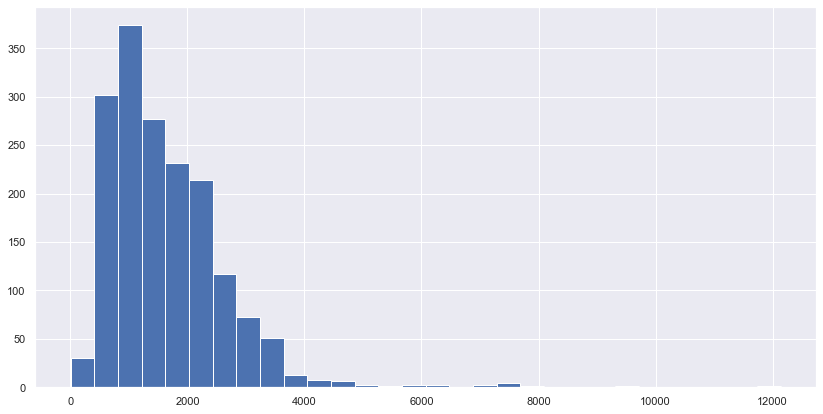

In [95]:
token_lengths = [len(tokenizer(text)["input_ids"]) for text in tqdm(texts)]
plt.figure(figsize=(14, 7))
plt.hist(token_lengths, bins=30);

In [97]:
max_length = 512

In [100]:
def encode(text, excerpt, text_max_length=4096):
    encoding = tokenizer(text, return_offsets_mapping=True)
    labels_list = [False] * len(encoding["input_ids"])
    
    for e in excerpt:
        start_index = text.index(e)
        end_index = start_index +  len(e)
        
        for i, offset in enumerate(encoding["offset_mapping"]):
            if offset[0] != offset[1] and offset[0] >= start_index and offset[1] <= end_index:
                labels_list[i] = True
    
    length = min(text_max_length, len(encoding["input_ids"]))
    
    input_ids = torch.zeros(text_max_length, dtype=torch.long)
    input_ids[:length] = torch.tensor(encoding["input_ids"][:length])
    
    attention_mask = torch.zeros(text_max_length, dtype=torch.long)
    attention_mask[:length] = 1
    
    labels = torch.zeros(text_max_length, dtype=torch.long)
    labels[:length] = torch.tensor(labels_list[:length])
    
    n_cutoff_labels = np.sum(labels_list[length:])
    if n_cutoff_labels > 0:
        print(f"Cutoff {n_cutoff_labels} labels!")
    
    factor = int(text_max_length / max_length)
    
    return {
        "input_ids": input_ids.reshape((factor, -1)),
        "attention_mask": attention_mask.reshape((factor, -1)),
        "labels": labels.reshape((factor, -1))
    }

input_ids = []
attention_mask = []
labels = []

for text, excerpt in zip(texts, excerpts):
    sample = encode(text, excerpt)
    
    input_ids.extend(sample["input_ids"])
    attention_mask.extend(sample["attention_mask"])
    labels.extend(sample["labels"])
    
input_ids = torch.stack(input_ids)
attention_mask = torch.stack(attention_mask)
labels = torch.stack(labels)

Cutoff 80 labels!
Cutoff 32 labels!
Cutoff 584 labels!
Cutoff 2092 labels!
Cutoff 186 labels!
Cutoff 186 labels!
Cutoff 226 labels!
Cutoff 1157 labels!
Cutoff 148 labels!
Cutoff 52 labels!
Cutoff 221 labels!


In [3]:
batch_size = 32
device = torch.device("cuda")
learning_rate = 1e-5
gradient_accumulation_steps = 2
epochs = 5
logging_steps = 50

In [102]:
torch.save((input_ids, attention_mask, labels), "data.pt")

In [4]:
(input_ids, attention_mask, labels) = torch.load("data.pt")

In [5]:
dataset = TensorDataset(input_ids, attention_mask, labels)
train_idx, valid_idx = train_test_split(np.arange(len(input_ids)), test_size=0.1, shuffle=True, random_state=1234)

train_dataset = Subset(dataset, train_idx)
valid_dataset = Subset(dataset, valid_idx)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [6]:
model = AutoModelForTokenClassification.from_pretrained("microsoft/xtremedistil-l6-h256-uncased", num_labels=2)
model.to(device).num_parameters()

Some weights of BertForTokenClassification were not initialized from the model checkpoint at microsoft/xtremedistil-l6-h256-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


12684802

In [7]:
model.load_state_dict(AutoModelForTokenClassification.from_pretrained("microsoft/xtremedistil-l6-h256-uncased", num_labels=2).state_dict())

Some weights of BertForTokenClassification were not initialized from the model checkpoint at microsoft/xtremedistil-l6-h256-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [8]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [9]:
losses = []
#scaler = torch.cuda.amp.GradScaler()

for epoch in range(epochs):
    for i, (input_ids, attention_mask, labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        loss = model(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device), labels=labels.to(device)).loss
        
        loss.backward()
        
        if (i + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
        
            optimizer.zero_grad()
            
        losses.append(loss.item())
        
        if (i + 1) % logging_steps == 0:
            print("Loss:", np.mean(losses[-logging_steps:]))
    
    valid_loss = 0
    
    for i, (input_ids, attention_mask, labels) in tqdm(enumerate(valid_loader), total=len(valid_loader)):
        with torch.inference_mode():
            loss = model(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device), labels=labels.to(device)).loss
            
        valid_loss += loss.item() * len(input_ids)
        
    valid_loss = valid_loss / len(valid_dataset)
    print("Valid Loss:", valid_loss)

  0%|          | 0/386 [00:00<?, ?it/s]

Loss: 0.6359110856056214
Loss: 0.5652610981464385
Loss: 0.5338351613283158
Loss: 0.5407661807537079
Loss: 0.5171451371908188
Loss: 0.5092184942960739
Loss: 0.5011690837144852


  0%|          | 0/43 [00:00<?, ?it/s]

Valid Loss: 0.4805344044944824


  0%|          | 0/386 [00:00<?, ?it/s]

Loss: 0.4823142075538635
Loss: 0.4618962347507477
Loss: 0.46104142010211946
Loss: 0.45704747796058653
Loss: 0.4500581645965576
Loss: 0.4287427896261215
Loss: 0.4441181290149689


  0%|          | 0/43 [00:00<?, ?it/s]

Valid Loss: 0.4405839648844985


  0%|          | 0/386 [00:00<?, ?it/s]

Loss: 0.4234100979566574
Loss: 0.40915629386901853
Loss: 0.43148463547229765
Loss: 0.4226802003383636
Loss: 0.42939706295728686
Loss: 0.4244151031970978
Loss: 0.419473779797554


  0%|          | 0/43 [00:00<?, ?it/s]

Valid Loss: 0.42803032562560533


  0%|          | 0/386 [00:00<?, ?it/s]

Loss: 0.40192145586013794
Loss: 0.3990325829386711
Loss: 0.3845550933480263
Loss: 0.39096012234687805
Loss: 0.4294986659288406
Loss: 0.4217846763134003
Loss: 0.3787607479095459


  0%|          | 0/43 [00:00<?, ?it/s]

Valid Loss: 0.4132426401544539


  0%|          | 0/386 [00:00<?, ?it/s]

Loss: 0.3826889541745186
Loss: 0.3874882137775421
Loss: 0.392705449461937
Loss: 0.3702755591273308
Loss: 0.3979994249343872
Loss: 0.37124911963939666
Loss: 0.4158660614490509


  0%|          | 0/43 [00:00<?, ?it/s]

Valid Loss: 0.40996836694290306


In [71]:
preds = []

for (input_ids, attention_mask, labels) in tqdm(valid_loader):
    with torch.inference_mode():
        output = model(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device), labels=labels.to(device))
        
        preds.extend(output.logits.argmax(2).detach().cpu())

  0%|          | 0/172 [00:00<?, ?it/s]

In [72]:
preds = torch.stack(preds)

In [76]:
preds.sum()

tensor(0)